In [1]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Praveen\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


**Importing the dataset**

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df = df.iloc[:, 2:]

In [4]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
df['Purchased'].unique()

array([0, 1], dtype=int64)

In [6]:
df.shape

(400, 3)

In [7]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(367, 3)

In [10]:
df.describe()

,Age,EstimatedSalary,Purchased
count,367.000000,367.000000,367.000000
mean,37.722071,70719.346049,0.376022
std,10.681383,34772.173908,0.485047
min,18.000000,15000.000000,0.000000
25%,29.500000,43000.000000,0.000000
50%,37.000000,71000.000000,0.000000
75%,46.000000,89000.000000,1.000000
max,60.000000,150000.000000,1.000000


### Ourlier

In [11]:
# Age Column
iqr = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
upper_threshold = df['Age'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['Age'].quantile(0.25) - (1.5 * iqr)
print(lower_threshold)
print(upper_threshold)

4.75
70.75


In [12]:
# EstimatedSalary Column
iqr = df['EstimatedSalary'].quantile(0.75) - df['EstimatedSalary'].quantile(0.25)
upper_threshold = df['EstimatedSalary'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['EstimatedSalary'].quantile(0.25) - (1.5 * iqr)
print(lower_threshold)
print(upper_threshold)

-26000.0
158000.0


There is no outlier in two columns 'Age' and 'EstimatedSalary'.

### EDA

In [13]:
df.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.167771,0.626164
EstimatedSalary,0.167771,1.000000,0.375624
Purchased,0.626164,0.375624,1.000000


Text(0, 0.5, 'EstimatedSalary')

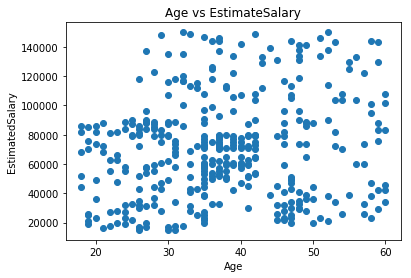

In [14]:
plt.scatter(df['Age'], df['EstimatedSalary'])
plt.title('Age vs EstimateSalary')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')

There is no Linear relationship between 'Age' and 'EstimatedSalary'. So, we have to use both the columns for the model.

In [15]:
# Seperating as Features and Target
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

**Splitting the dataset into the Training set and Test set**

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

**Feature Scaling**

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x_train)
sc.transform(x_test)

array([[-0.63157497,  0.12587786],
       [ 0.93479796,  2.10143114],
       [-0.26301663,  0.80405287],
       [ 0.38196046,  1.12839744],
       [ 1.02693754,  2.10143114],
       [-0.35515621,  1.33479853],
       [-1.09227288, -1.17150042],
       [ 2.04047296, -1.05355694],
       [ 1.11907713, -0.9945852 ],
       [-0.90799372, -0.75869824],
       [ 0.10554171, -0.81766998],
       [-1.09227288,  0.4797083 ],
       [-1.09227288, -1.61378846],
       [-1.09227288,  1.42325613],
       [ 0.19768129, -0.25743845],
       [-0.72371455,  0.27330721],
       [ 0.28982087,  0.30279308],
       [ 1.67191463, -0.28692432],
       [-0.17087705, -0.58178302],
       [ 1.94833338, -0.81766998],
       [ 1.39549588,  0.06690612],
       [ 0.28982087, -1.17150042],
       [-0.26301663, -1.25995803],
       [ 0.38196046,  0.09639199],
       [-1.18441247, -1.40738738],
       [-0.90799372,  1.57068548],
       [-0.26301663,  0.21433547],
       [ 1.30335629,  0.59765178],
       [ 0.01340212,

**Fitting Decision Tree Classification to the Training set**

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(x_train, y_train)
    trainAccuracy = roc_auc_score(y_train, dt.predict(x_train))
    dt = DecisionTreeClassifier(max_depth=depth)
    valAccuracy = cross_val_score(dt, x_train, y_train, cv=10)
    print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.81177681352915  Cross val score :  0.8298941798941799
Depth  :  2  Training Accuracy :  0.9154149977748108  Cross val score :  0.9025132275132275
Depth  :  3  Training Accuracy :  0.9154149977748108  Cross val score :  0.8953703703703704
Depth  :  4  Training Accuracy :  0.934134401424121  Cross val score :  0.8989417989417989
Depth  :  5  Training Accuracy :  0.9400867823765019  Cross val score :  0.9062169312169314
Depth  :  6  Training Accuracy :  0.9553849577214063  Cross val score :  0.8584656084656086
Depth  :  7  Training Accuracy :  0.9770527369826435  Cross val score :  0.8657407407407407
Depth  :  8  Training Accuracy :  0.9736593235425011  Cross val score :  0.8474867724867725
Depth  :  9  Training Accuracy :  0.9906542056074766  Cross val score :  0.8547619047619047
Depth  :  10  Training Accuracy :  0.9906542056074766  Cross val score :  0.8548941798941799
Depth  :  20  Training Accuracy :  0.9953271028037383  Cross val score :  0.843783

In [25]:
classifier = DecisionTreeClassifier(max_depth = 5)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

**Predicting the Test set results**

In [26]:
# Predicting a new result
print(classifier.predict(sc.transform([[22, 75520]])))

[0]


In [27]:
# Predicting test set results
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]]


**Making the Confusion Matrix**

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56  5]
 [ 5 26]]


**Visualising the Training set results**

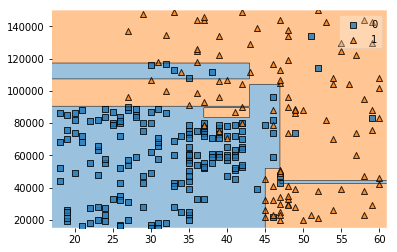

In [29]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train, clf=classifier)

**Visualising the Test set results**

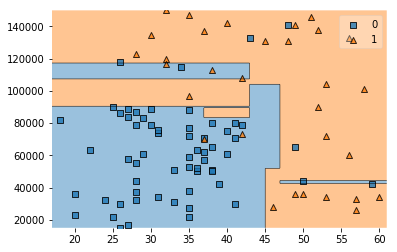

In [30]:
plot_decision_regions(x_test, y_test, clf=classifier)